In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import squareform
from scipy.sparse.csgraph import minimum_spanning_tree

In [3]:
df = pd.read_csv("diabetes.csv")


===== CORRELATION (ADJACENCY MATRIX) =====

               Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
Pregnancies       1.000000  0.129459       0.141282      -0.081672 -0.073535   
Glucose           0.129459  1.000000       0.152590       0.057328  0.331357   
BloodPressure     0.141282  0.152590       1.000000       0.207371  0.088933   
SkinThickness    -0.081672  0.057328       0.207371       1.000000  0.436783   
Insulin          -0.073535  0.331357       0.088933       0.436783  1.000000   
BMI               0.017683  0.221071       0.281805       0.392573  0.197859   
Pedigree         -0.033523  0.137337       0.041265       0.183928  0.185071   
Age               0.544341  0.263514       0.239528      -0.113970 -0.042163   
Outcome           0.221898  0.466581       0.065068       0.074752  0.130548   

                    BMI  Pedigree       Age   Outcome  
Pregnancies    0.017683 -0.033523  0.544341  0.221898  
Glucose        0.221071  0.137337  0.26351

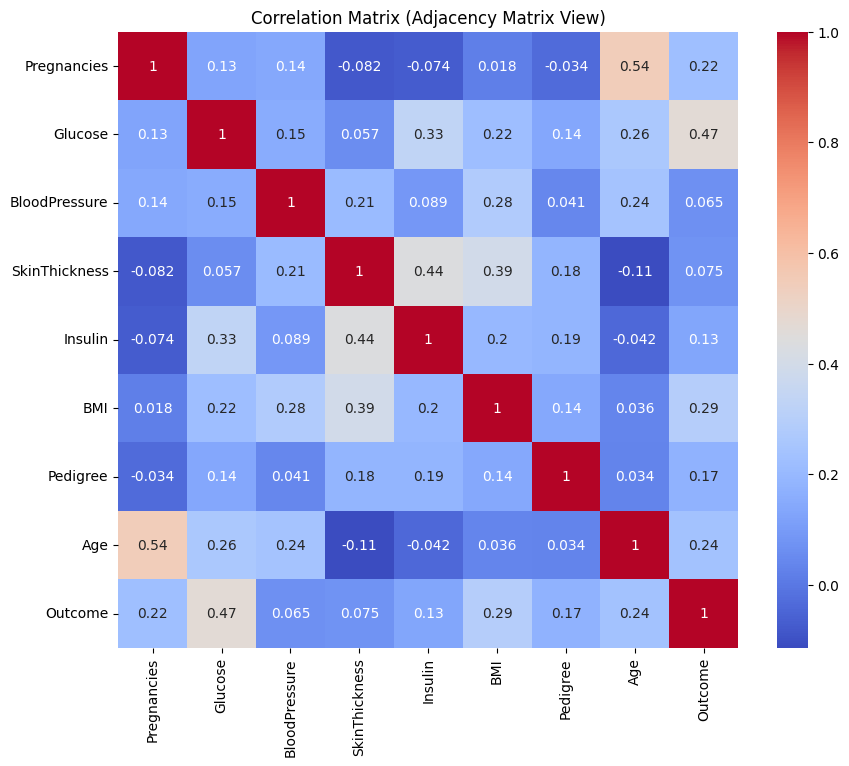

In [5]:
# 2. CREATE CORRELATION MATRIX
# ------------------------------
corr = df.corr()

print("\n===== CORRELATION (ADJACENCY MATRIX) =====\n")
print(corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Adjacency Matrix View)")
plt.show()

In [7]:
# 3. BUILD NETWORK USING CORRELATION
# ------------------------------
G = nx.Graph()

# Add nodes
for col in df.columns:
    G.add_node(col)

# Add edges only if |corr| > 0.30
threshold = 0.30

for i in corr.columns:
    for j in corr.columns:
        if i != j:
            weight = corr.loc[i, j]
            if abs(weight) >= threshold:
                G.add_edge(i, j, weight=weight)

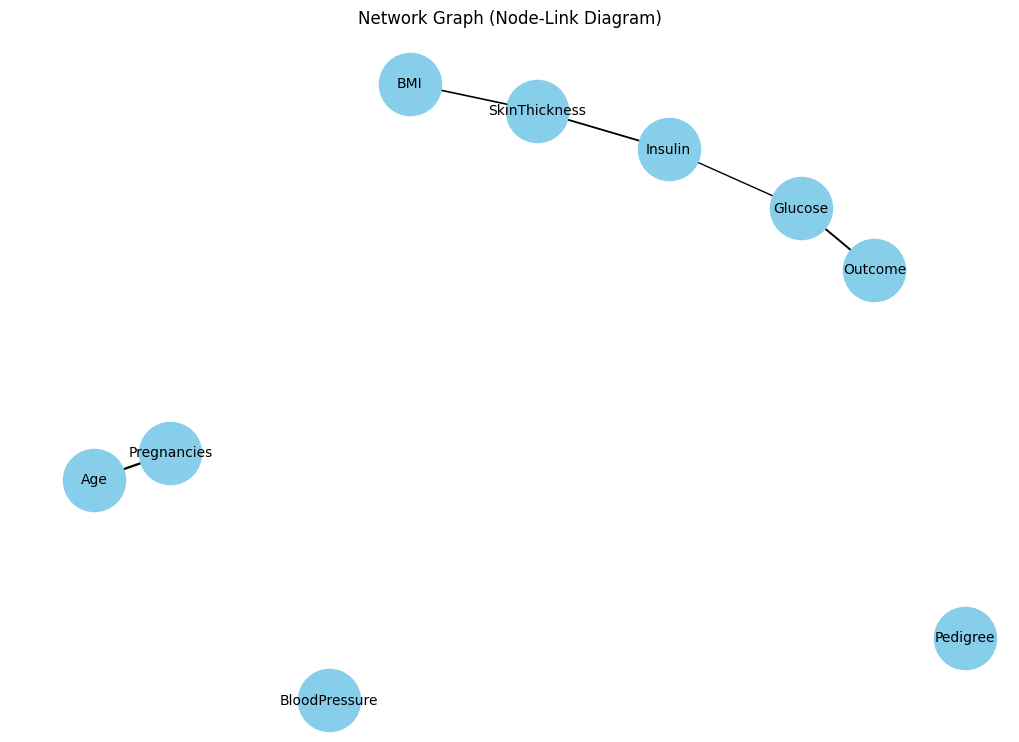

In [9]:
#4. VISUALIZE NETWORK (Link-Mark Diagram)
# ------------------------------
plt.figure(figsize=(10,7))
pos = nx.spring_layout(G, seed=42)

edges = G.edges()
weights = [abs(G[u][v]['weight']) * 3 for u,v in edges]

nx.draw(
    G, pos,
    with_labels=True,
    node_size=2000,
    node_color="skyblue",
    font_size=10,
    width=weights
)

plt.title("Network Graph (Node-Link Diagram)")
plt.show()

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.spatial.distance import squareform
from scipy.sparse.csgraph import minimum_spanning_tree
df = pd.read_csv("diabetes.csv")
num_df = df.select_dtypes(include='number')

# 2. Correlation matrix
corr = num_df.corr()

# 3. Distance matrix
dist = 1 - np.abs(corr)

# 4. Minimum Spanning Tree
mst_matrix = minimum_spanning_tree(dist)

# 5. Convert MST to network graph (NetworkX 3.x)
mst_graph = nx.from_scipy_sparse_array(mst_matrix)

# 6. Rename nodes with original column names
mapping = {i: col for i, col in enumerate(num_df.columns)}
mst_graph = nx.relabel_nodes(mst_graph, mapping)


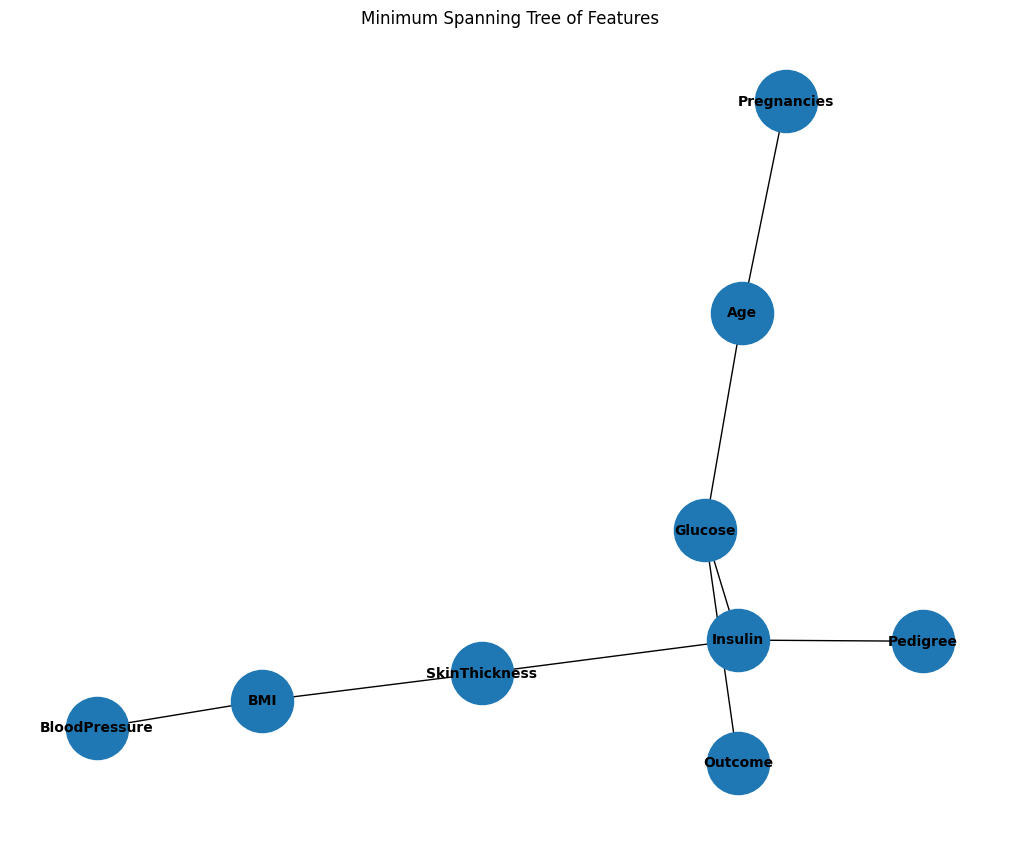

In [10]:
plt.figure(figsize=(10, 8))

pos = nx.spring_layout(mst_graph, seed=42)  # layout for nice visualization

nx.draw(
    mst_graph, pos,
    with_labels=True,
    node_size=2000,
    font_size=10,
    font_weight="bold"
)

plt.title("Minimum Spanning Tree of Features")
plt.show()